In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("simulation_results.csv")

# 2. Extract final portfolio values and investments for each model
last = df.iloc[-1]
models = ['adaboost','GBR','lr','svr','heuristic','lstm','optm','lr2']

final_values_total = pd.DataFrame({m: df[f'portfolio_value_{m}'] for m in models})
investments_total  = pd.DataFrame({m: df[f'investment_{m}']       for m in models})

log_returns_total=np.log(final_values_total/investments_total)
log_returns_total = log_returns_total.fillna(0)

final_values = {m: last[f'portfolio_value_{m}'] for m in models}
investments  = {m: last[f'investment_{m}']       for m in models}

# 3. Compute ROI and log returns
roi      = {m: (final_values[m] - investments[m]) / investments[m] if investments[m] > 0 else np.nan for m in models}
log_ret  = {m: np.log(final_values[m] / investments[m]) if investments[m] > 0 else np.nan for m in models}


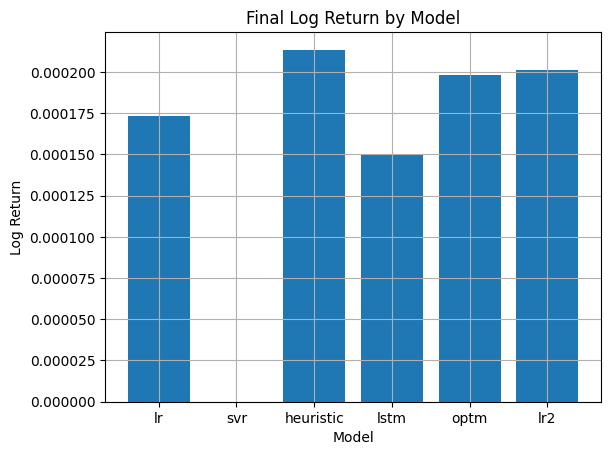

In [3]:
# 4. Plot final log return per model
plt.figure()
plt.bar(models, [log_ret[m] for m in models])
plt.xlabel("Model")
plt.ylabel("Log Return")
plt.title("Final Log Return by Model")
plt.grid(True)
plt.show()


In [4]:
log_returns_total

,adaboost,GBR,lr,svr,heuristic,lstm,optm,lr2
0,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000
1,0.0,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000
2,0.0,0.0,9.474849e-07,0.0,0.000000,9.474849e-07,9.474849e-07,0.000000
3,0.0,0.0,7.106137e-07,0.0,0.000000,7.106137e-07,7.106137e-07,0.000000
4,0.0,0.0,-7.106132e-07,0.0,0.000000,-5.684905e-07,-7.106132e-07,0.000000
...,...,...,...,...,...,...,...,...
345593,0.0,0.0,1.731079e-04,0.0,0.000213,1.498862e-04,1.978990e-04,0.000201
345594,0.0,0.0,1.731079e-04,0.0,0.000213,1.498862e-04,1.978969e-04,0.000201
345595,0.0,0.0,1.731079e-04,0.0,0.000213,1.498862e-04,1.978935e-04,0.000201
345596,0.0,0.0,1.731079e-04,0.0,0.000213,1.498862e-04,1.978914e-04,0.000201


In [5]:
def plot_drawdown(returns: pd.DataFrame) -> None:
    cumulative_returns = (1 + returns).cumprod()
    running_max = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - running_max) / running_max

    fig, ax = plt.subplots(figsize=(12, 6))
    drawdowns.plot(ax=ax)
    ax.set_title('Drawdown')
    ax.set_xlabel(None)
    ax.legend(title="portfolio")
    plt.show()

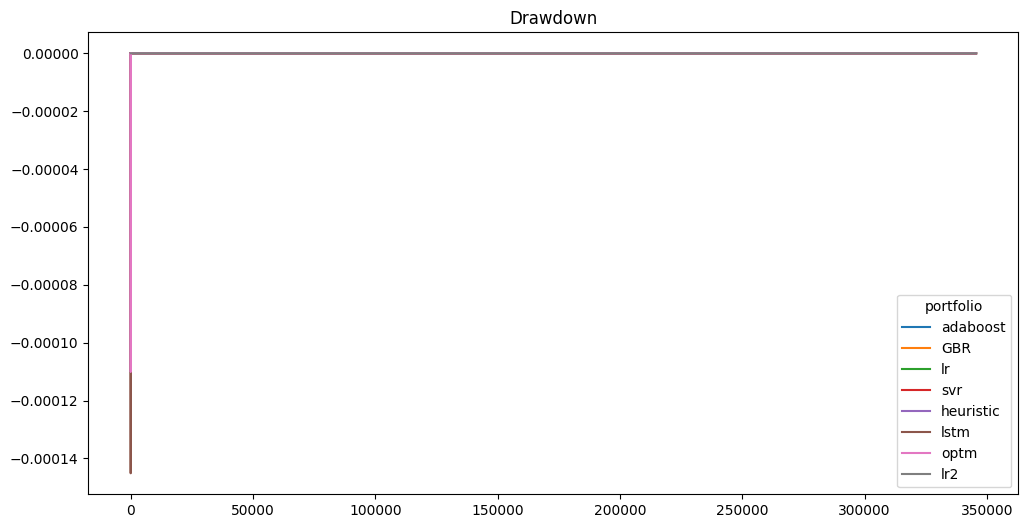

In [6]:
plot_drawdown(log_returns_total)

In [7]:
start = '2024-11-01 00:00:00'
end = '2024-11-01 23:59:59.999'
datetime_index = pd.date_range(start, end, freq='250ms')

In [8]:
log_returns_total.index = datetime_index[2:].values

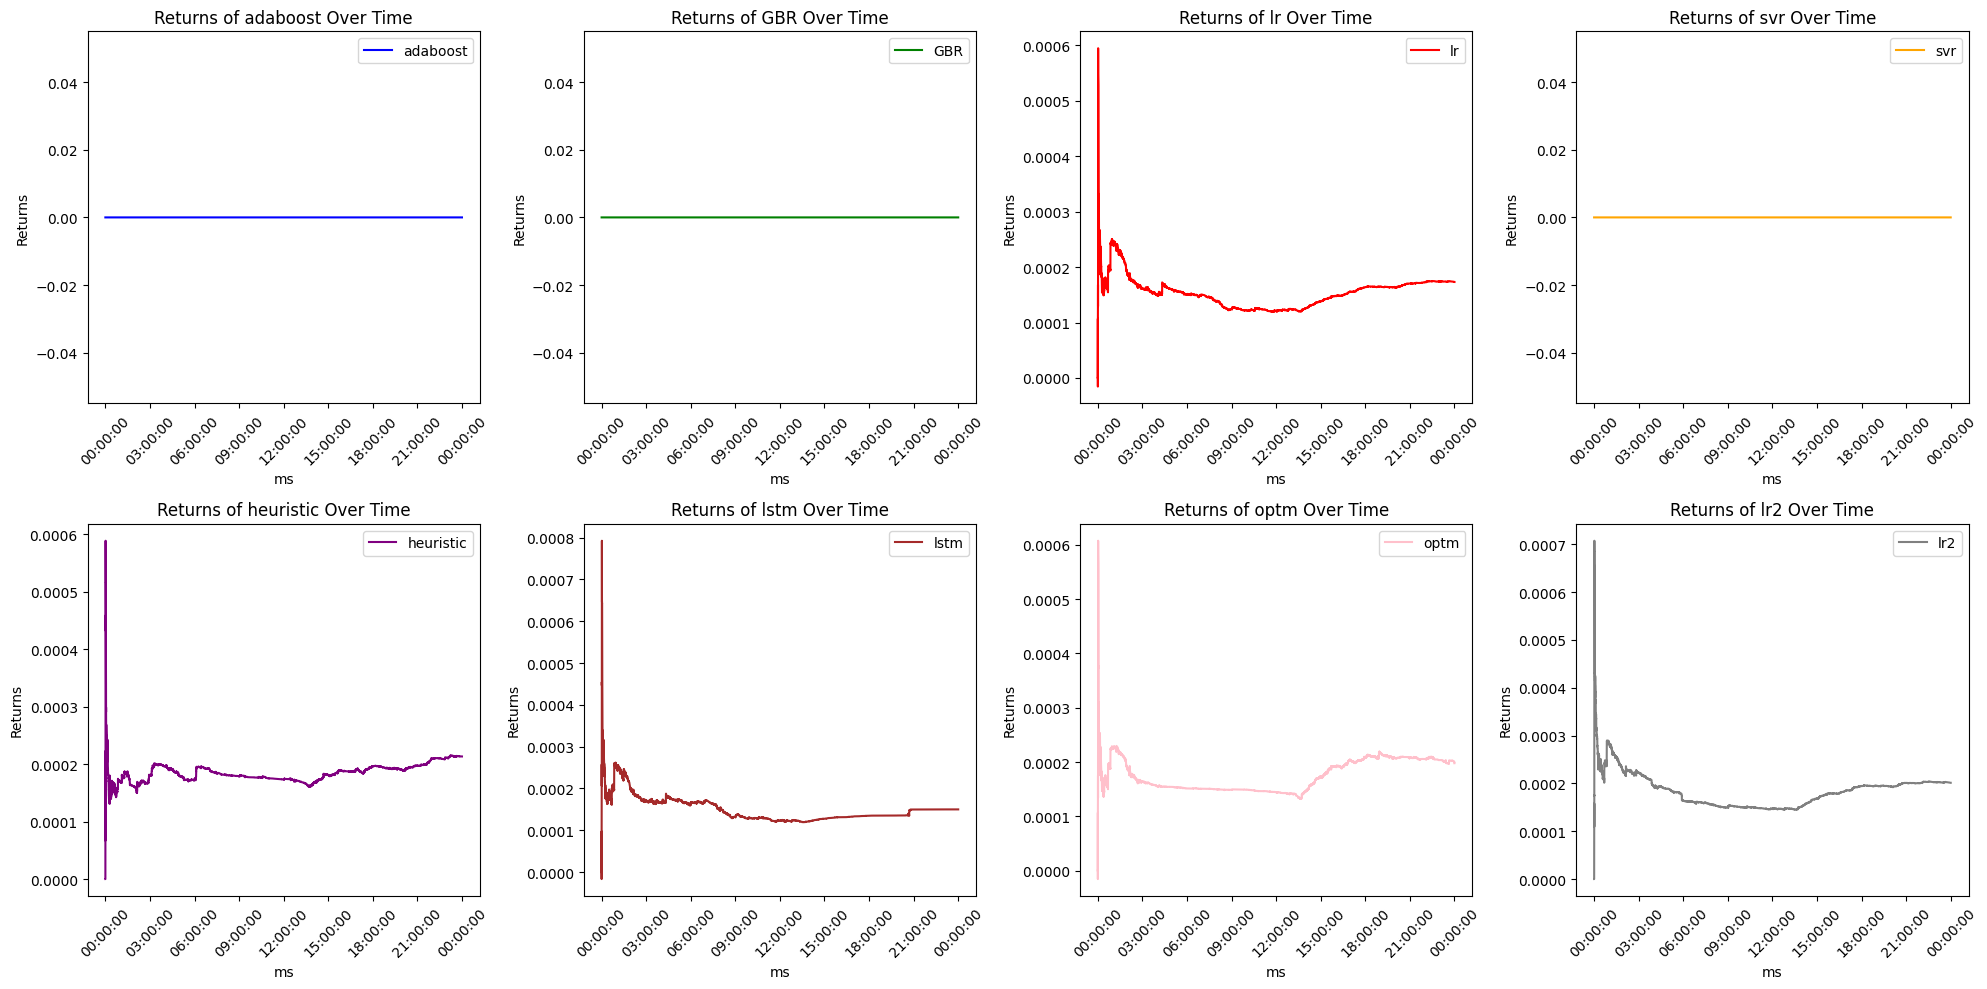

In [9]:
plt.figure(figsize=(20, 10))

colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']  # Define colors for each subplot

for i, column in enumerate(log_returns_total.columns):
    plt.subplot(2, 4, i + 1)
    plt.plot(log_returns_total.index, log_returns_total[column], label=column, color=colors[i])
    plt.title(f'Returns of {column} Over Time')
    plt.xlabel('ms')
    plt.ylabel('Returns')
    plt.legend()
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.tight_layout()
plt.show()